<h1>By: Joel <br> Class: DAAA/2B/06<br> admin no: 2112729</h1>
<h1>

# Cifar 100 has 100 classes
> Collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Research on the dataset:
>Cifar 100 contains 80 million tiny dataset images. They are colored which means they have 3 channels and each channel has 32 by 32 pixels.
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

|  SuperClass |  Classes |   
|-------------|---|
| aquatic mammals  |  	beaver, dolphin, otter, seal, whale |  
|   fish    |  	aquarium fish, flatfish, ray, shark, trout | 
|  flowers |  	orchids, poppies, roses, sunflowers, tulips |
|food containers|	bottles, bowls, cans, cups, plates |
|fruit and vegetables|apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|clock, computer keyboard, lamp, telephone, television|
|household furniture|bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
| medium-sized mammals|fox, porcupine, possum, raccoon, skunk|
| non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles_1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles_2|	lawn-mower, rocket, streetcar, tank, tractor|

In [51]:
import tensorflow 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import cifar100

# Exploratory Data analysis

In [52]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [53]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print unique classes
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())


y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


X_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
Unique classes count: 100
19    500
69    500
88    500
32    500
34    500
     ... 
81    500
22    500
21    500
65    500
16    500
Name: 0, Length: 100, dtype: int64


In [54]:
# split train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


# print unique classes
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())


X_train shape: (40000, 32, 32, 3) y_train shape: (40000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
4     400
2     400
84    400
15    400
37    400
     ... 
62    400
41    400
12    400
0     400
93    400
Name: 0, Length: 100, dtype: int64


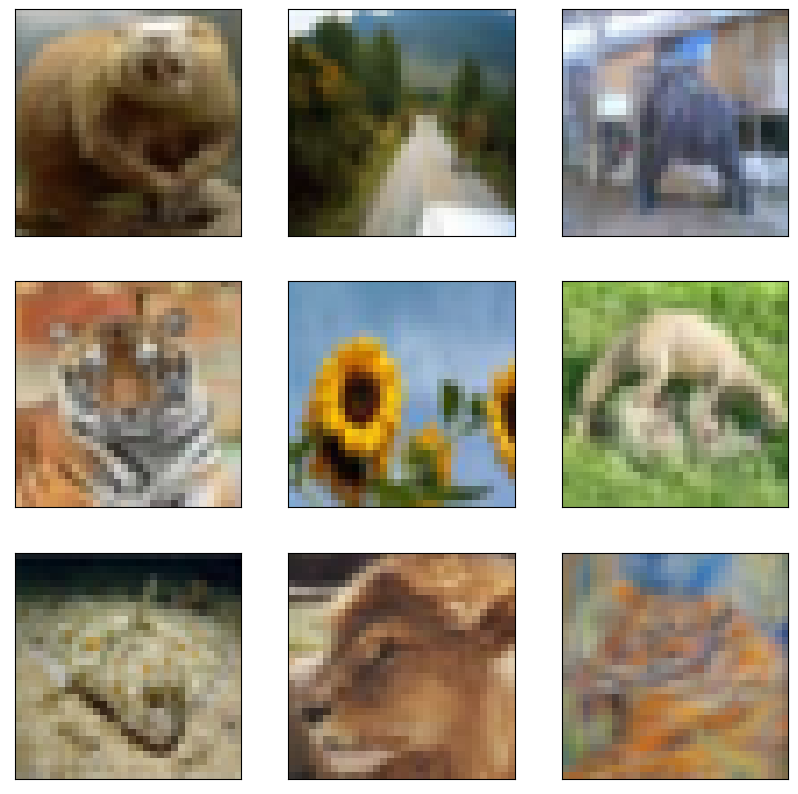

In [55]:
# show some images of the dataset
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set(xticks=[], yticks=[])
plt.show()



In [73]:
# Functions for plotting
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = plotly.subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

![](./image/Filtering.gif)
> Image is different from a typical MNIST dataset as it is now coloured, below is a sneak peak of what goes on in the code below

In [57]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
epochs = 15
num_classes = 100
seed = np.random.seed(1)






fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



after (40000, 100) (10000, 100)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               6422656   
                                                                 
 dense_5 (Dense)             (None, 100)               12900     
                                                                 
Total params: 6,454,948
Trainable params: 6,454,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1

c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Exploring on Cifar 10 (coarse)

In [69]:
# import cifar 10
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="coarse")
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# split train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print number of samples in each class
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


X_train shape: (40000, 32, 32, 3) y_train shape: (40000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
Unique classes count: 20
1     2000
18    2000
10    2000
5     2000
8     2000
6     2000
13    2000
7     2000
17    2000
15    2000
14    2000
4     2000
2     2000
3     2000
16    2000
11    2000
12    2000
0     2000
9     2000
19    2000
Name: 0, dtype: int64
after (40000, 20) (10000, 20)


In [74]:


epochs = 15
num_classes = 20
seed = np.random.seed(1)







fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
fashion_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
mc = ModelCheckpoint('dummy_model_20.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val) , callbacks=[early_stopping, mc])

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 flatten_10 (Flatten)        (None, 50176)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               6422656   
                                                                 
 dense_21 (Dense)            (None, 20)                2580      
                                                                 
Total params: 6,444,628
Trainable params: 6,444,628
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [=====================